In [1]:
from def_dict import *
from PreProcessing import *

In [2]:
org_path = 'data/w58y67/org/'
load_path = 'data/w58y67/preprocessing_2/step_1/'
save_path = 'data/w58y67/preprocessing_2/step_2/'
if_not_make(save_path)

In [3]:
df = PreProcess(org_path, load_path, save_path)

In [4]:
wav_info = df.wav_info 
wav_name = df.wav_name

In [538]:
wav_info.shape
wav_name.shape

(3210,)

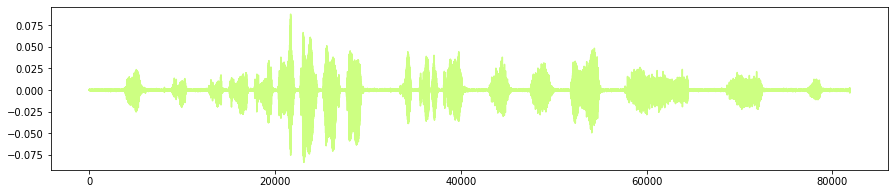

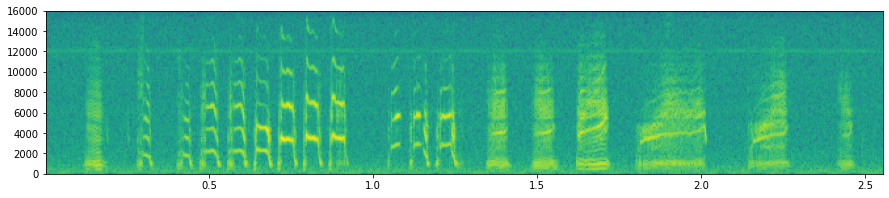

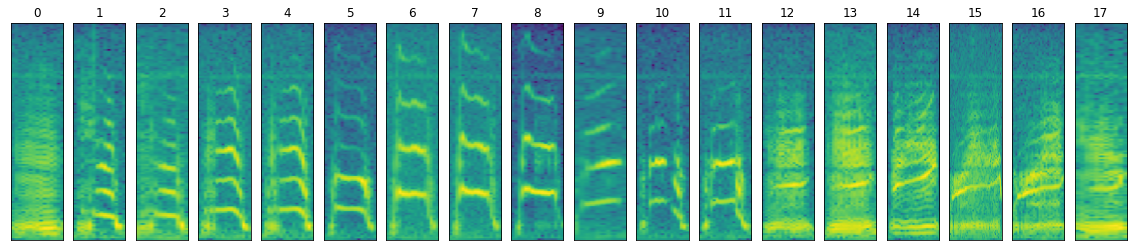

In [331]:
df.draw_splited_wav(5)

0.72 2.0


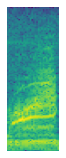

In [552]:
idx = 333
syllable = wav_info[idx]
#df.draw_syllable_wav(syllable)
df.draw_syllable_spectogram(syllable)

In [351]:
height=128 
width=64 

def getx(x):
    
    y = (x*64)/6000
    return y

In [353]:
getx(4200)

44.8

In [490]:
import io
import cv2

def get_img_from_fig(fig, dpi=100):
    buf = io.BytesIO()
    fig.savefig(buf, format="png", dpi=dpi)
    buf.seek(0)
    img_arr = np.frombuffer(buf.getvalue(), dtype=np.uint8)
    buf.close()
    img = cv2.imdecode(img_arr, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    return img

def get_data_img(syllable, xcond, xsize, ysize):
    
    
    x, val = df.get_syllable_value(syllable)
    
    #xlen = round( ( (len(val)*xsize)/xcond)/100, 2)
    #ylen = ysize/100
    xlen = xsize/100
    ylen = ysize/100
    
    #print(xlen,ylen)
    fig = plt.figure(figsize=(xlen, ylen))
    plt.specgram(val, Fs = x, cmap='gray')
    plt.axis('off'), plt.xticks([]), plt.yticks([])
    plt.tight_layout()
    plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
    plt.close('all')
    
    # you can get a high-resolution image as numpy array!!
    arr = get_img_from_fig(fig)    
    #duration = arr.shape[1]
    #stack = xsize-duration
    #add_arr = np.full( fill_value = ( 0, 0, 0), shape = ( arr.shape[0], stack, 3), dtype = np.uint8)
    #arr = np.hstack((arr,add_arr))


    return arr

In [501]:
xcond = 6000

data_info = wav_info[wav_info[:,2]<xcond]
print(wav_info.shape, data_info.shape)

data = []
n = 0
for syllable in data_info:
    arr = get_data_img(syllable, xcond, 64, 128)
    data.append(arr)
    n=n+1
    if n%500==0: print(n)
data = np.array(data)
data.shape

(54905, 3) (51721, 3)
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
25000
25500
26000
26500
27000
27500
28000
28500
29000
29500
30000
30500
31000
31500
32000
32500
33000
33500
34000
34500
35000
35500
36000
36500
37000
37500
38000
38500
39000
39500
40000
40500
41000
41500
42000
42500
43000
43500
44000
44500
45000
45500
46000
46500
47000
47500
48000
48500
49000
49500
50000
50500
51000
51500


(51721, 128, 64, 3)

In [502]:
data_1d = data[:,:,:,0]

In [503]:
np.save('%s/data_same'%save_path, data_1d)
np.save('%s/data_info'%save_path, data_info)

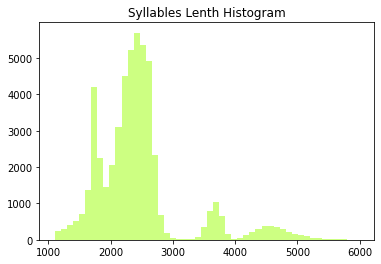

In [300]:
hist_syllable_lenth(data_info[:, 2])

In [509]:
data_info.shape, wav_info.shape, wav_name.shape

((51721, 3), (54905, 3), (3210,))

array([[    0,  4775,  2239],
       [    0,  9120,  1672],
       [    0, 11162,  2435],
       ...,
       [ 3209, 32183,  3880],
       [ 3209, 50348,  4132],
       [ 3209, 57457,  1988]])